# Meta-Data - Study II
## Imports

In [1]:
# Load Dependencies
import seaborn as sns
import StudyII_All_5_note_Sets.paths as StudyII_paths
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Data
studyII_GL = pd.read_pickle(StudyII_paths.processed_dir + StudyII_paths.post_exclusion_data_pickle_filename) # Study II: Post-exclusion group-level data

## Demographics

   sona subject_gender
0   387         Female
1   175           Male
2     6          Other


D:\Users\selte\anaconda3\envs\Scale_Studies\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


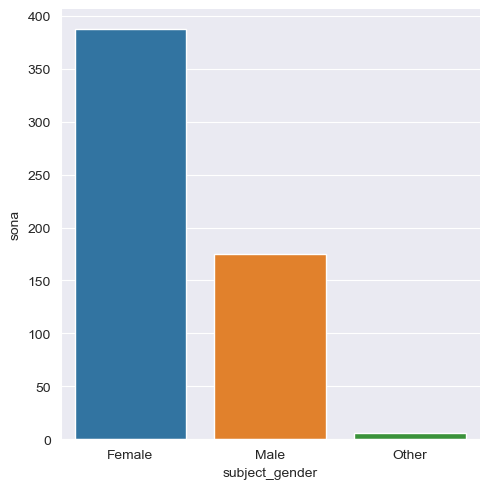

In [3]:
temp = studyII_GL

# Only keep the most recent 'subject'
# If a task set was taken more than once, only keep the most recent one
temp = temp.drop_duplicates(subset=['subject'], keep='last')

# Only keep the most recent 'sona', because some subjects took the task more than once
temp = temp.drop_duplicates(subset=['sona'], keep='last') 

# group total subjects by length
temp = temp.groupby(['subject_gender']).count().reset_index()
# plot
sns.catplot(y="sona", x="subject_gender", kind="bar", data=temp)

# Print number of subjects
print(temp[['sona','subject_gender']])

Average age and range of ages for each melody length:
  index  subject_age
0  mean         19.5
1   min         17.0
2   max         27.0


D:\Users\selte\anaconda3\envs\Scale_Studies\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


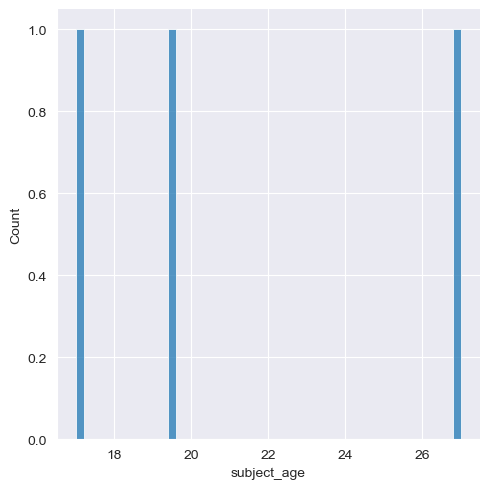

In [4]:
temp = studyII_GL
# Only keep the most recent 'subject'
temp = temp.drop_duplicates(subset=['subject'], keep='last')
temp = temp.drop_duplicates(subset=['sona'], keep='last')

# Only keep ages under 120
temp = temp[temp['subject_age'] < 50]

# Get average age and range of ages for each melody length
temp = temp.agg({'subject_age': ['mean', 'min', 'max']}).reset_index()

# Plot the age distribution
sns.displot(data=temp, x="subject_age", bins=50)


print("Average age and range of ages for each melody length:")
print(temp)



## Count how many tasks each subject took

Number of tasks taken by each subject:
   sona  # tasks
0   515        1
1    44        2
2     9        3


D:\Users\selte\anaconda3\envs\Scale_Studies\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


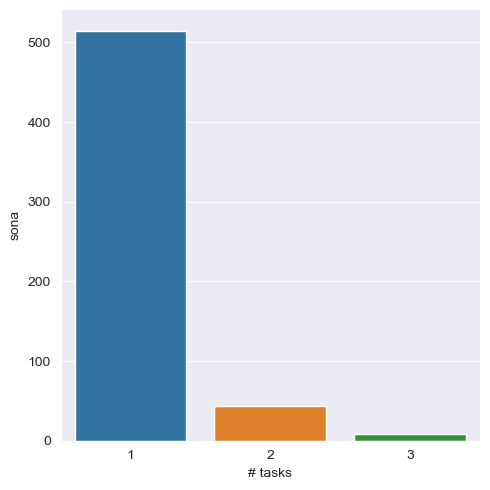

In [8]:
temp = studyII_GL
temp = temp.drop_duplicates(subset=['subject'], keep='last')
temp = temp.groupby(['sona']).count().reset_index()
temp = temp.rename(columns={'index':'# tasks'})
temp = temp.groupby('# tasks').count().reset_index()
sns.catplot(y="sona", x="# tasks", kind="bar", data=temp)
print("Number of tasks taken by each subject:")
print(temp[['sona','# tasks']])

## Plots
### Number of subjects per set

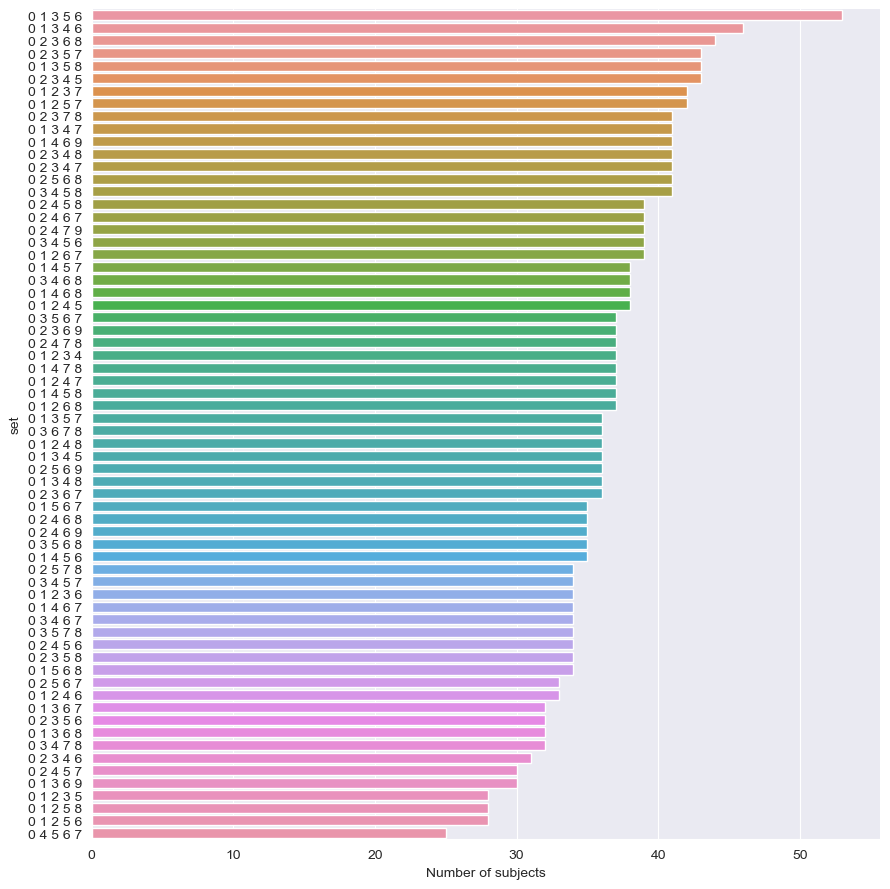

In [5]:
temp = studyII_GL.groupby('set').count().reset_index()
temp = temp.rename(columns={'subject':'Number of subjects'})
plot_order = temp.sort_values(by=["Number of subjects"], ascending=False)['set'].values
sns.catplot(y="set", x="Number of subjects", kind="bar", data=temp, order=plot_order, height=9)
plt.savefig(StudyII_paths.plots_dir + "subjects_per_set.svg")

### Avg. number of trials per set

C:\Users\selte\AppData\Local\Temp\ipykernel_1612\1026158929.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = studyII_GL.groupby('set').mean().reset_index()


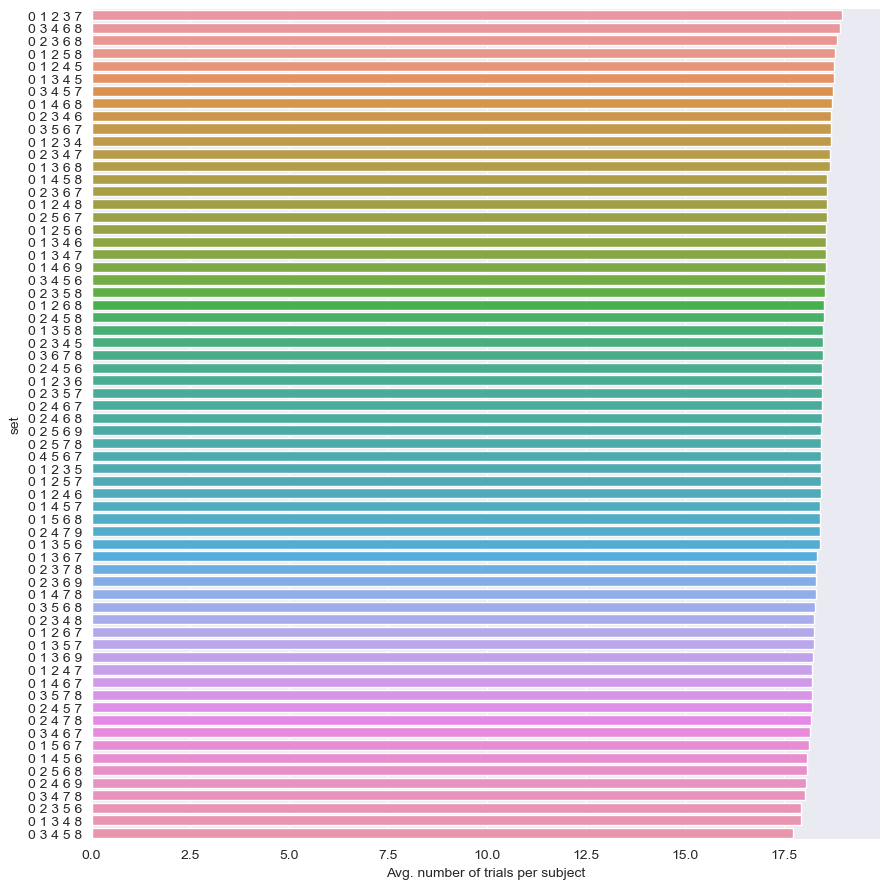

In [6]:
temp = studyII_GL.groupby('set').mean().reset_index()
temp = temp.rename(columns={'# trials':'Avg. number of trials per subject'})
plot_order = temp.sort_values(by=["Avg. number of trials per subject"], ascending=False)['set'].values
sns.catplot(y="set", x="Avg. number of trials per subject", kind="bar", data=temp, order=plot_order, height=9)
plt.savefig(StudyII_paths.plots_dir + "mean_trials_per_set.svg")

### Avg. number of trials per subject - When ignoring neither presses

C:\Users\selte\AppData\Local\Temp\ipykernel_45676\4108065021.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = studyII_GL.groupby('set').mean().reset_index()


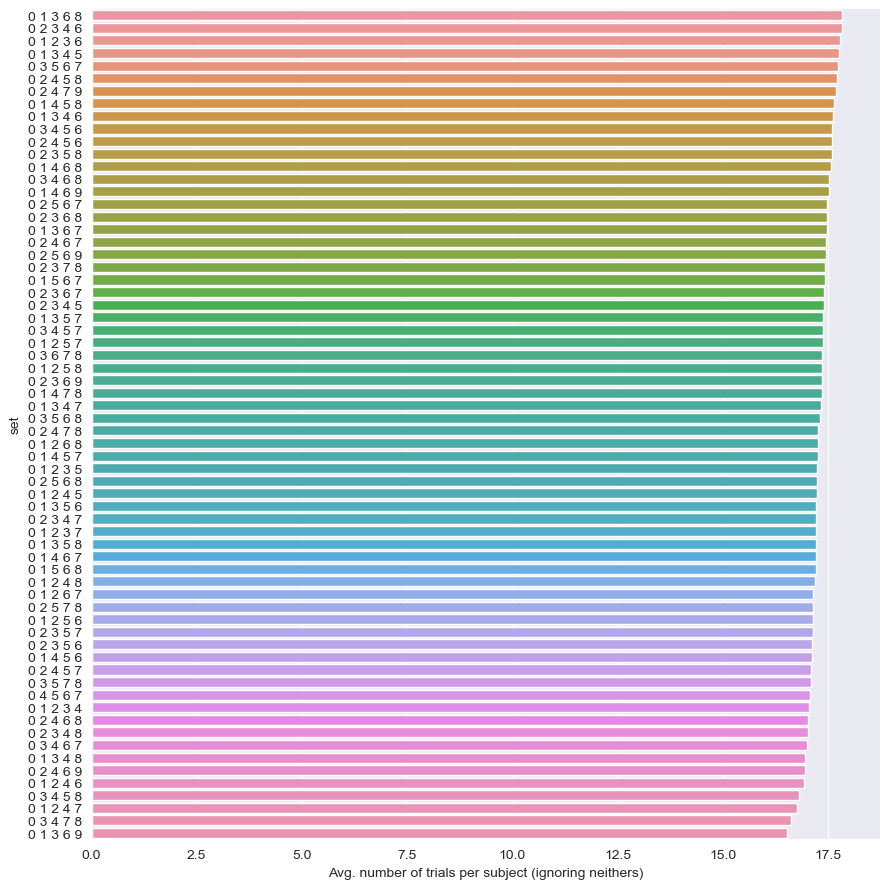

In [10]:
temp = studyII_GL.groupby('set').mean().reset_index()
temp = temp.rename(columns={'# no_neither_trials':'Avg. number of trials per subject (ignoring neithers)'})
plot_order = temp.sort_values(by=["Avg. number of trials per subject (ignoring neithers)"], ascending=False)['set'].values
sns.catplot(y="set", x="Avg. number of trials per subject (ignoring neithers)", kind="bar", data=temp, order=plot_order, height=9)
plt.savefig(StudyII_paths.plots_dir + "mean_trials_per_subject.svg")

### Distribution of button presses
1st - left button
neither - middle button
2nd - right button

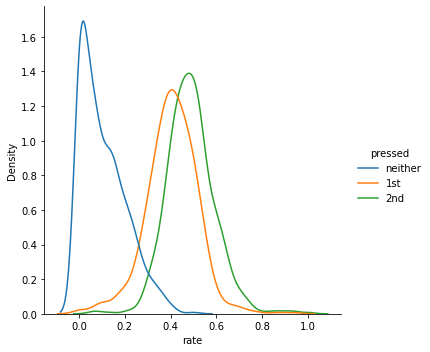

In [15]:
# Study II: Distribution of button presses
temp = studyII_GL[['subject', 'rate pressed neither (task)','rate pressed 1st (task)','rate pressed 2nd (task)']]
temp = temp.rename(columns={'rate pressed neither (task)':'neither','rate pressed 1st (task)':'1st','rate pressed 2nd (task)':'2nd'})
temp = temp.groupby('subject').mean().stack().reset_index()
temp = temp.rename(columns={'level_1':'pressed',0:'rate'})
sns.displot(data=temp, x="rate", hue="pressed",kind='kde')
plt.savefig(StudyII_paths.plots_dir + "dist_of_buttons.svg")

### Distribution of amount of "neither" presses across the task

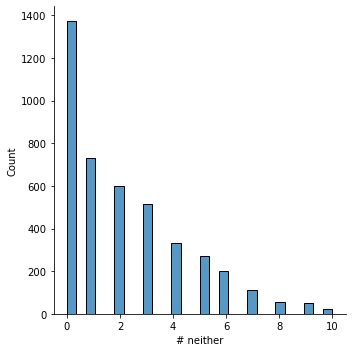

In [7]:
# Study II: Distribution of amount of neithers across the task
sns.displot(data=studyII_GL, x="# neither")
plt.savefig(StudyII_paths.plots_dir + "dist_of_neithers.svg")

### Number of subjects by musical experience


In [24]:
temp = studyII_GL.groupby('sona').first().reset_index()


no_training = temp[temp['How many years of formal musical training do you have?'] == "0"].shape[0]

lots_of_training = temp[temp['How many years of formal musical training do you have?'].isin(["6-8", "9+"])].shape[0]

only_latest_subject = studyII_GL.drop_duplicates(subset=['subject'], keep='last')

task_counts = only_latest_subject.groupby(['sona']).count().reset_index()
took_3_times = task_counts[task_counts['index'] == 3].shape[0]
took_2_times = task_counts[task_counts['index'] == 2].shape[0]
took_1_time = task_counts[task_counts['index'] == 1].shape[0]


print(f"{no_training} subjects self-reported having no formal music training at all, and {lots_of_training} self-reported having more than 5 years of formal musical training. {took_3_times} subjects took the task 3 times, {took_2_times} subjects took the task 2 times, and the remaining took it once. The online experiment was self-paced and was designed to last approximately one hour")


168 subjects self-reported having no formal music training at all, and 159 self-reported having more than 5 years of formal musical training. 9 subjects took the task 3 times, 44 subjects took the task 2 times, and the remaining took it once. The online experiment was self-paced and was designed to last approximately one hour
